# Introduction to Python for Machine Learning - Understanding Electric Utility Data

__`Author`__ - _Chukwunonso Obuekwe_\
`Student ID` - $e203cf$

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
fuel_data = pd.read_csv('./fuel_ferc1.csv')

In [72]:
fuel_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

___
# Data Description

This data provided is the fuel quality data from the __Federal Energy Regulatory Commission__ which is provided by the United States Energy Information Administration. It consists of the following columns:


__Feature__ | __Description__
---|---
`Record_id` | record id
`Utility_id_ferc1` | Utility id assigned by the FERC
`Report_year` | year of report
`Plant_name_ferc1` | the name of the plant
`Fuel_type_code_pudl` | the type of fuel
`Fuel_unit` | the unit of fuel
`Fuel_qty_burned` | the quantity of fuel burned
`Fuel_mmbtu_per_unit` | the measure of energy per unit
`fuel_cost_per_unit_burned` | the fuel cost per unit burned
`Fuel_cost_per_unit_delivered` | the cost of fuel delivered per unit
`fuel_cost_per_mmbtu` | the cost of fuel per mmbtu

In [73]:
fuel_data

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


___
# __Missing Data Handling__

## Question

Which feature has missing values and what is the _total number of missing value_ and _percentage of the missing rows as a factor of the total number of rows_ in three decimal places?

In [74]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [75]:
# From this it is clear that there are missing values in the ``fuel_unit`` column

print('Percentage of observations missing from fuel_unit: {}{}'.format(round(100 * ((29523 - 29343)/29523), 3), '%'))

Percentage of observations missing from fuel_unit: 0.61%


$$OR$$

In [76]:
missing = fuel_data.isnull().sum()
missing[missing > 0]

fuel_unit    180
dtype: int64

In [77]:
print('Percentage of observations missing from fuel_unit: {}{}'.format((round(100 * 180 / len(fuel_data), 2)), '%'))

Percentage of observations missing from fuel_unit: 0.61%


## Question

The feature with missing values falls under what category? What missing value imputation technique would you use?

In [78]:
fuel_data.groupby(by='fuel_type_code_pudl')['fuel_unit'].value_counts()

fuel_type_code_pudl  fuel_unit
coal                 ton           8438
                     mmbtu           52
                     mcf              5
                     bbl              1
gas                  mcf          11333
                     mmbtu           94
                     ton              4
                     bbl              2
nuclear              gramsU         464
                     kgU            110
                     mwhth          100
                     mwdth           95
                     mmbtu           34
oil                  bbl           7952
                     gal             81
                     mcf              7
                     ton              3
other                ton             77
                     bbl             42
                     mcf              9
                     gal              3
waste                ton            436
                     bbl              1
Name: fuel_unit, dtype: int64

In [79]:
temp = lambda x: x.mode().iloc[0]
fuel_data.fuel_unit = fuel_data.fuel_unit.fillna(fuel_data.groupby(by='fuel_type_code_pudl')['fuel_unit'].transform(temp))

In [80]:
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [81]:
fuel_data

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [82]:
fuel_data.groupby(by='fuel_type_code_pudl')['fuel_unit'].value_counts()

fuel_type_code_pudl  fuel_unit
coal                 ton           8489
                     mmbtu           52
                     mcf              5
                     bbl              1
gas                  mcf          11386
                     mmbtu           94
                     ton              4
                     bbl              2
nuclear              gramsU         479
                     kgU            110
                     mwhth          100
                     mwdth           95
                     mmbtu           34
oil                  bbl           7973
                     gal             81
                     mcf              7
                     ton              3
other                ton            113
                     bbl             42
                     mcf              9
                     gal              3
waste                ton            440
                     bbl              1
Name: fuel_unit, dtype: int64

Testing if the data has been accurately filled

In [83]:
fuel_data.groupby(by='fuel_type_code_pudl')['fuel_unit'].value_counts().sum() == len(fuel_data)

True

___
# Correlation and Statistics

## Question

Which of the features has the $second$ and $third$ lowest correlation with the `Fuel Cost Per Unit Burned`?

In [84]:
fuel_data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [85]:
print('The Second and Third lowest correlation with Fuel Cost Per Unit Burned: \n{}'.format(fuel_data.corr()['fuel_cost_per_unit_burned'].sort_values()[1:3]))

The Second and Third lowest correlation with Fuel Cost Per Unit Burned: 
fuel_qty_burned       -0.018535
fuel_mmbtu_per_unit   -0.010034
Name: fuel_cost_per_unit_burned, dtype: float64


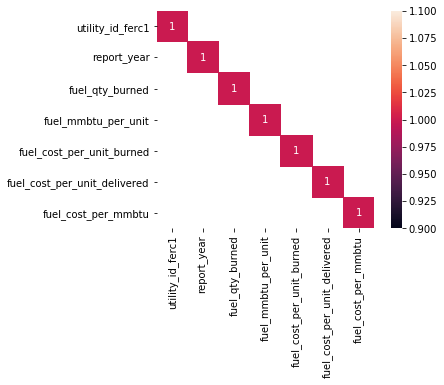

In [86]:
sns.heatmap(fuel_data.corr()[(fuel_data.corr() >= 0.5) | (fuel_data.corr() <= -0.4)], annot=True, square=True)

## Question

What is the $skewness$ and $kurtosis$ for the `fuel quantity burned` in two decimal places?

In [87]:
print('The skewness for the fuel_quantity_burned feature is {0} and it\'s kurtosis is {1}'.format(fuel_data.fuel_qty_burned.skew().round(2), fuel_data.fuel_qty_burned.kurtosis().round(2)))

The skewness for the fuel_quantity_burned feature is 15.85 and it's kurtosis is 651.37


## Question

What is the $standard\, deviation$ and $75th\, percentile$ of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

In [88]:
fuel_data.fuel_mmbtu_per_unit.describe().loc[['std', '75%']]

std    10.60022
75%    17.00600
Name: fuel_mmbtu_per_unit, dtype: float64

___
# Quantitative and Qualitative Analysis

## Question

Which of the following `fuel type code` has the $lowest$ average fuel cost per unit burned?

In [89]:
by_fuel_type = fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean().sort_values()

In [90]:
by_fuel_type

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

In [91]:
by_fuel_type[by_fuel_type == by_fuel_type.min()]

fuel_type_code_pudl
gas    13.659397
Name: fuel_cost_per_unit_burned, dtype: float64

## Question

Which year has the highest average `fuel cost per unit delivered`?

In [92]:
by_year = fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().sort_values()

In [93]:
by_year

report_year
1999       25.551627
1995       32.735269
2006       38.657484
2005       41.438184
2007       43.325023
2017       46.196861
2002       47.594361
2003       55.663493
2008       58.588197
2011       59.774667
2001       60.050396
2012       60.994502
1994       63.636060
2010       91.862105
2016      103.901761
2004      139.524275
2013      172.307591
2014      192.737183
1998      287.154420
2015      326.535511
2018      499.269966
2009      652.694163
2000      985.362877
1996     9196.705948
1997    11140.197239
Name: fuel_cost_per_unit_delivered, dtype: float64

In [94]:
by_year[by_year == by_year.max()]

report_year
1997    11140.197239
Name: fuel_cost_per_unit_delivered, dtype: float64

## Question

For the `fuel type` __coal__, what is the percentage change in the fuel cost per unit burned in $1998$ compared to $1994$?

In [95]:
by_year_fueltype = fuel_data.groupby(['report_year', 'fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].sum()

In [96]:
by_year_fueltype

report_year  fuel_type_code_pudl
1994         coal                    14984.572
             gas                     10792.496
             nuclear                227983.354
             oil                      9362.194
             other                     116.737
                                       ...    
2018         coal                     9488.197
             gas                      4322.494
             nuclear                173267.161
             oil                     33836.602
             waste                     660.972
Name: fuel_cost_per_unit_burned, Length: 148, dtype: float64

In [97]:
print('Percentage change in fuel cost per unit burned in 1998 compared to 1994 is {}{}'.format((100 * ((by_year_fueltype.loc[(1998, 'coal')] - by_year_fueltype.loc[(1994, 'coal')]) / by_year_fueltype.loc[(1994, 'coal')])).round(0), '%'))

Percentage change in fuel cost per unit burned in 1998 compared to 1994 is -21.0%


___
# Python and NumPy

In [98]:
A = [1,2,3,4,5,6]

In [99]:
B = [13, 21, 34]

In [100]:
A.extend(B)

In [101]:
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

To create an identity matrix

In [102]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [103]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])